In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Data = pd.read_csv("owid-covid-data.csv")

In [3]:
Data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024-05-01,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
399359,ZWE,Africa,Zimbabwe,2024-05-02,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
399360,ZWE,Africa,Zimbabwe,2024-05-03,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
399361,ZWE,Africa,Zimbabwe,2024-05-04,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


#### Filled unknown rows under continent column with "Others"  since there are figures allocated to total_cases, total_deaths, etc in the dataset

In [4]:
Data["continent"] = Data["continent"].fillna("Others")

##### The total number of rows and columns in the dataset

In [5]:
Data.shape

(399363, 67)

#### Important information about the dataset was explored in detail

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399363 entries, 0 to 399362
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    399363 non-null  object 
 1   continent                                   399363 non-null  object 
 2   location                                    399363 non-null  object 
 3   date                                        399363 non-null  object 
 4   total_cases                                 360296 non-null  float64
 5   new_cases                                   388138 non-null  float64
 6   new_cases_smoothed                          386908 non-null  float64
 7   total_deaths                                337785 non-null  float64
 8   new_deaths                                  388495 non-null  float64
 9   new_deaths_smoothed                         387265 non-null  float64
 

#### Meticulously checked through the dataset for possible missing and null values

In [7]:
Data.isnull().sum().sort_values(ascending = False)

weekly_icu_admissions_per_million          388543
weekly_icu_admissions                      388543
excess_mortality_cumulative_per_million    386087
excess_mortality                           386087
excess_mortality_cumulative                386087
                                            ...  
continent                                       0
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

#### Missing and unknown values were replaced with 0

In [9]:
Data = Data.fillna(0)

In [10]:
Data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024-05-01,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
399359,ZWE,Africa,Zimbabwe,2024-05-02,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
399360,ZWE,Africa,Zimbabwe,2024-05-03,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
399361,ZWE,Africa,Zimbabwe,2024-05-04,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399363 entries, 0 to 399362
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    399363 non-null  object 
 1   continent                                   399363 non-null  object 
 2   location                                    399363 non-null  object 
 3   date                                        399363 non-null  object 
 4   total_cases                                 399363 non-null  float64
 5   new_cases                                   399363 non-null  float64
 6   new_cases_smoothed                          399363 non-null  float64
 7   total_deaths                                399363 non-null  float64
 8   new_deaths                                  399363 non-null  float64
 9   new_deaths_smoothed                         399363 non-null  float64
 

#### Columns in the dataset; Sixty-Seven(67) in total

In [12]:
Data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

#### The dataset was backed_up should there be any need to manipulate or add further information to the dataset

In [13]:
Back_up = Data.copy()

In [14]:
Back_up

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024-05-01,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
399359,ZWE,Africa,Zimbabwe,2024-05-02,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
399360,ZWE,Africa,Zimbabwe,2024-05-03,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
399361,ZWE,Africa,Zimbabwe,2024-05-04,266362.0,0.0,0.429,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


#### 7 columns were used to give further insight and meaning to the analysis in the dataset

In [16]:
Data = Data[["iso_code","continent","location","date","total_cases","total_deaths","total_vaccinations"]]

In [17]:
Data

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0
...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024-05-01,266362.0,5740.0,0.0
399359,ZWE,Africa,Zimbabwe,2024-05-02,266362.0,5740.0,0.0
399360,ZWE,Africa,Zimbabwe,2024-05-03,266362.0,5740.0,0.0
399361,ZWE,Africa,Zimbabwe,2024-05-04,266362.0,5740.0,0.0


#### Total_cases, total_deaths and total_vaccinations columns were converted from float datatype to integer datatype through a custom function

In [18]:
def clean_data(x):
        return int(x)

In [19]:
clean_data(266362.0)

266362

In [20]:
Data["total_cases"] = Data["total_cases"].apply(clean_data)

In [21]:
Data["total_deaths"] = Data["total_deaths"].apply(clean_data)

In [22]:
Data["total_vaccinations"] = Data["total_vaccinations"].apply(clean_data)

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399363 entries, 0 to 399362
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   iso_code            399363 non-null  object
 1   continent           399363 non-null  object
 2   location            399363 non-null  object
 3   date                399363 non-null  object
 4   total_cases         399363 non-null  int64 
 5   total_deaths        399363 non-null  int64 
 6   total_vaccinations  399363 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 21.3+ MB


#### Checked for possible missing values in the newly extracted dataset. Just to confirm there are no missing or incomplete values. 

In [24]:
Data.shape

(399363, 7)

#### No missing value was found in the extracted dataset

In [25]:
Data.isnull().sum().sort_values(ascending = False)

iso_code              0
continent             0
location              0
date                  0
total_cases           0
total_deaths          0
total_vaccinations    0
dtype: int64

#### Date was converted from object datatype to datetime datatype

In [26]:
Data["date"] = pd.to_datetime(Data.date)

In [27]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399363 entries, 0 to 399362
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   iso_code            399363 non-null  object        
 1   continent           399363 non-null  object        
 2   location            399363 non-null  object        
 3   date                399363 non-null  datetime64[ns]
 4   total_cases         399363 non-null  int64         
 5   total_deaths        399363 non-null  int64         
 6   total_vaccinations  399363 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 21.3+ MB


#### A breakdown of the date column led to three additional columns to better undertsand trend in the number of Covid-19 cases recorded across board.

In [28]:
Data["month name"] = Data.date.dt.month_name()
Data["month"] = Data.date.dt.month
Data["year"] = Data.date.dt.year

In [29]:
Data

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,month name,month,year
0,AFG,Asia,Afghanistan,2020-01-05,0,0,0,January,1,2020
1,AFG,Asia,Afghanistan,2020-01-06,0,0,0,January,1,2020
2,AFG,Asia,Afghanistan,2020-01-07,0,0,0,January,1,2020
3,AFG,Asia,Afghanistan,2020-01-08,0,0,0,January,1,2020
4,AFG,Asia,Afghanistan,2020-01-09,0,0,0,January,1,2020
...,...,...,...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024-05-01,266362,5740,0,May,5,2024
399359,ZWE,Africa,Zimbabwe,2024-05-02,266362,5740,0,May,5,2024
399360,ZWE,Africa,Zimbabwe,2024-05-03,266362,5740,0,May,5,2024
399361,ZWE,Africa,Zimbabwe,2024-05-04,266362,5740,0,May,5,2024


#### Formated date column to day_month_year

In [30]:
Data["date"] = Data["date"].dt.strftime("%Y/%m/%d")

In [31]:
Data

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,month name,month,year
0,AFG,Asia,Afghanistan,2020/01/05,0,0,0,January,1,2020
1,AFG,Asia,Afghanistan,2020/01/06,0,0,0,January,1,2020
2,AFG,Asia,Afghanistan,2020/01/07,0,0,0,January,1,2020
3,AFG,Asia,Afghanistan,2020/01/08,0,0,0,January,1,2020
4,AFG,Asia,Afghanistan,2020/01/09,0,0,0,January,1,2020
...,...,...,...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024/05/01,266362,5740,0,May,5,2024
399359,ZWE,Africa,Zimbabwe,2024/05/02,266362,5740,0,May,5,2024
399360,ZWE,Africa,Zimbabwe,2024/05/03,266362,5740,0,May,5,2024
399361,ZWE,Africa,Zimbabwe,2024/05/04,266362,5740,0,May,5,2024


#### Filtered out needless items from both location and continent columns.

In [32]:
Excluded_items =["Africa","Asia","Europe","European Union","High income","Low income","Lower middle income","South America","World","North America","Upper middle income","Western Sahara"]

In [33]:
Data = Data[~Data["location"].isin(Excluded_items)]

In [34]:
Data["location"].nunique()

243

In [35]:
Data["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America', 'Others'], dtype=object)

In [36]:
Data

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,month name,month,year
0,AFG,Asia,Afghanistan,2020/01/05,0,0,0,January,1,2020
1,AFG,Asia,Afghanistan,2020/01/06,0,0,0,January,1,2020
2,AFG,Asia,Afghanistan,2020/01/07,0,0,0,January,1,2020
3,AFG,Asia,Afghanistan,2020/01/08,0,0,0,January,1,2020
4,AFG,Asia,Afghanistan,2020/01/09,0,0,0,January,1,2020
...,...,...,...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024/05/01,266362,5740,0,May,5,2024
399359,ZWE,Africa,Zimbabwe,2024/05/02,266362,5740,0,May,5,2024
399360,ZWE,Africa,Zimbabwe,2024/05/03,266362,5740,0,May,5,2024
399361,ZWE,Africa,Zimbabwe,2024/05/04,266362,5740,0,May,5,2024


#### The location column was appriopriately renamed as country

In [37]:
Data.rename(columns = {"location":"country"},inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18856\3563061811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.rename(columns = {"location":"country"},inplace = True)


In [38]:
Data

,iso_code,continent,country,date,total_cases,total_deaths,total_vaccinations,month name,month,year
0,AFG,Asia,Afghanistan,2020/01/05,0,0,0,January,1,2020
1,AFG,Asia,Afghanistan,2020/01/06,0,0,0,January,1,2020
2,AFG,Asia,Afghanistan,2020/01/07,0,0,0,January,1,2020
3,AFG,Asia,Afghanistan,2020/01/08,0,0,0,January,1,2020
4,AFG,Asia,Afghanistan,2020/01/09,0,0,0,January,1,2020
...,...,...,...,...,...,...,...,...,...,...
399358,ZWE,Africa,Zimbabwe,2024/05/01,266362,5740,0,May,5,2024
399359,ZWE,Africa,Zimbabwe,2024/05/02,266362,5740,0,May,5,2024
399360,ZWE,Africa,Zimbabwe,2024/05/03,266362,5740,0,May,5,2024
399361,ZWE,Africa,Zimbabwe,2024/05/04,266362,5740,0,May,5,2024


#### Recent cases of Covid_19

In [39]:
Recent_cases = Data.sort_values("year", ascending = False).reset_index()

In [40]:
Recent_cases

,index,iso_code,continent,country,date,total_cases,total_deaths,total_vaccinations,month name,month,year
0,399362,ZWE,Africa,Zimbabwe,2024/05/05,266362,5740,0,May,5,2024
1,76017,COG,Africa,Congo,2024/04/08,25217,389,0,April,4,2024
2,76019,COG,Africa,Congo,2024/04/10,25217,389,0,April,4,2024
3,76020,COG,Africa,Congo,2024/04/11,25217,389,0,April,4,2024
4,76021,COG,Africa,Congo,2024/04/12,25217,389,0,April,4,2024
...,...,...,...,...,...,...,...,...,...,...,...
381823,80953,HRV,Europe,Croatia,2020/06/12,2247,104,0,June,6,2020
381824,80954,HRV,Europe,Croatia,2020/06/13,2247,104,0,June,6,2020
381825,80955,HRV,Europe,Croatia,2020/06/14,2251,107,0,June,6,2020
381826,80956,HRV,Europe,Croatia,2020/06/15,2251,107,0,June,6,2020


#### No duplicated values in the dataset

In [41]:
Data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
399358    False
399359    False
399360    False
399361    False
399362    False
Length: 381828, dtype: bool

##### Breakdown of Covid-19 cases as per each continent

In [42]:
Continent_data = Data.groupby("continent")[["total_cases","total_deaths","total_vaccinations"]].sum().sort_values("total_cases", ascending = False).reset_index()

In [43]:
Continent_data

,continent,total_cases,total_deaths,total_vaccinations
0,Asia,224734767819,1641425700,4531533467985
1,Europe,213761182548,2169883692,729476061457
2,North America,115769154131,1728894124,579189959211
3,South America,67233060925,1523734367,427304093641
4,Africa,13420754722,283377083,50853254202
5,Oceania,10235411946,20953762,26231305311
6,Others,10235411946,20953762,76659133988


#### Below is the graphical breakdown of Covid-19 cases in each continent from 2020 till-date

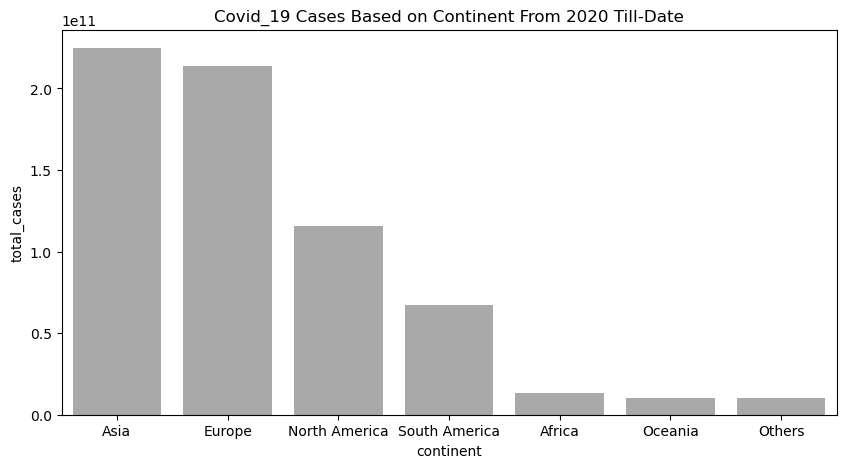

In [44]:
plt.figure(figsize =(10,5))
sns.barplot(Continent_data, x="continent", y="total_cases", color="darkgray", orient ="v")
plt.title("Covid_19 Cases Based on Continent From 2020 Till-Date")
plt.show()

#### Total cases of Covid-19 in Africa

In [45]:
Africa_data = Data[Data["continent"] == "Africa"].sort_values("total_cases", ascending = False).reset_index()

In [46]:
Africa_data

,index,iso_code,continent,country,date,total_cases,total_deaths,total_vaccinations,month name,month,year
0,331879,ZAF,Africa,South Africa,2024/05/05,4072681,102595,0,May,5,2024
1,331878,ZAF,Africa,South Africa,2024/05/04,4072677,102595,0,May,5,2024
2,331877,ZAF,Africa,South Africa,2024/05/03,4072677,102595,0,May,5,2024
3,331876,ZAF,Africa,South Africa,2024/05/02,4072677,102595,0,May,5,2024
4,331875,ZAF,Africa,South Africa,2024/05/01,4072677,102595,0,May,5,2024
...,...,...,...,...,...,...,...,...,...,...,...
90226,145581,GIN,Africa,Guinea,2020/02/04,0,0,0,February,2,2020
90227,145582,GIN,Africa,Guinea,2020/02/05,0,0,0,February,2,2020
90228,145583,GIN,Africa,Guinea,2020/02/06,0,0,0,February,2,2020
90229,145584,GIN,Africa,Guinea,2020/02/07,0,0,0,February,2,2020


#### Number of Covid-19 cases in different continent

In [47]:
Continent_number_of_cases = Data.groupby("continent").agg({"total_cases":["sum","count"]})

In [48]:
Continent_number_of_cases

total_cases       
                        sum  count
continent                         
Africa          13420754722  90231
Asia           224734767819  78846
Europe         213761182548  86070
North America  115769154131  64916
Oceania         10235411946  38004
Others          10235411946   1595
South America   67233060925  22166

#### Yearly number of Covid-19 cases

In [49]:
Yearly_cases = Data.groupby("year").agg({"total_cases":["sum","count"]}).sort_values("year", ascending = False)

In [50]:
Yearly_cases

total_cases       
               sum  count
year                     
2024   99498045387  29925
2023  284326489553  87665
2022  198018324377  88669
2021   66181345280  88644
2020    7365539440  86925

#### Updated record of Covid-19 cases in Nigeria

In [51]:
Total_cases_in_Nigeria = Data[Data["country"] == "Nigeria"].sort_values("total_cases", ascending = False).reset_index()

In [52]:
Total_cases_in_Nigeria

,index,iso_code,continent,country,date,total_cases,total_deaths,total_vaccinations,month name,month,year
0,254089,NGA,Africa,Nigeria,2024/05/05,267188,3155,0,May,5,2024
1,254026,NGA,Africa,Nigeria,2024/03/03,267188,3155,0,March,3,2024
2,253996,NGA,Africa,Nigeria,2024/02/02,267188,3155,0,February,2,2024
3,253997,NGA,Africa,Nigeria,2024/02/03,267188,3155,0,February,2,2024
4,253998,NGA,Africa,Nigeria,2024/02/04,267188,3155,0,February,2,2024
...,...,...,...,...,...,...,...,...,...,...,...
1578,252541,NGA,Africa,Nigeria,2020/02/08,0,0,0,February,2,2020
1579,252540,NGA,Africa,Nigeria,2020/02/07,0,0,0,February,2,2020
1580,252539,NGA,Africa,Nigeria,2020/02/06,0,0,0,February,2,2020
1581,252538,NGA,Africa,Nigeria,2020/02/05,0,0,0,February,2,2020


In [53]:
len(Total_cases_in_Nigeria)

1583

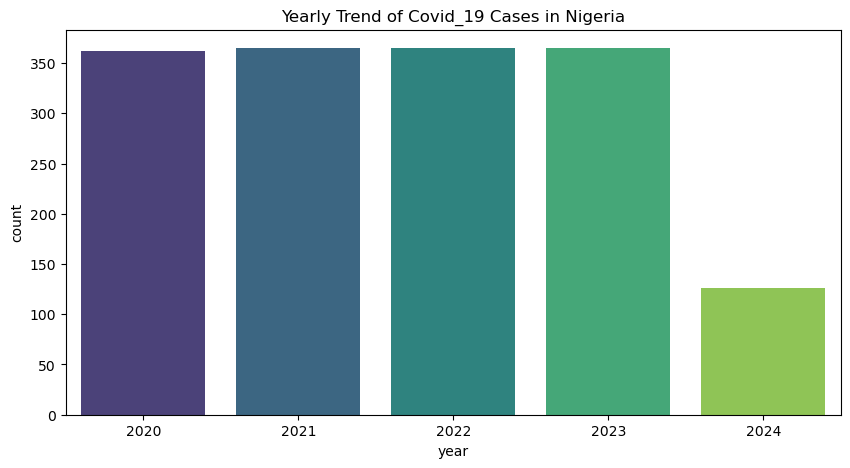

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(Total_cases_in_Nigeria,x="year", palette= "viridis")
plt.title("Yearly Trend of Covid_19 Cases in Nigeria")
plt.show()

In [55]:
Total_cases_per_country = Data.groupby("country")[["total_cases","total_deaths"]].sum().sort_values("total_cases", ascending = False).reset_index()

In [56]:
Total_cases_per_country

,country,total_cases,total_deaths
0,United States,96501732018,1193908549
1,China,50747677039,68154097
2,India,47980841517,588097048
3,Brazil,36863068307,781640946
4,France,31728094678,182226506
...,...,...,...
238,North Korea,0,0
239,Wales,0,0
240,Northern Ireland,0,0
241,Taiwan,0,0


In [57]:
Data = Data.set_index("date")

In [58]:
Data

,iso_code,continent,country,total_cases,total_deaths,total_vaccinations,month name,month,year
date,,,,,,,,,
2020/01/05,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/06,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/07,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/08,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/09,AFG,Asia,Afghanistan,0,0,0,January,1,2020
...,...,...,...,...,...,...,...,...,...
2024/05/01,ZWE,Africa,Zimbabwe,266362,5740,0,May,5,2024
2024/05/02,ZWE,Africa,Zimbabwe,266362,5740,0,May,5,2024
2024/05/03,ZWE,Africa,Zimbabwe,266362,5740,0,May,5,2024


In [61]:
Data

,iso_code,continent,country,total_cases,total_deaths,total_vaccinations,month name,month,year
date,,,,,,,,,
2020/01/05,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/06,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/07,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/08,AFG,Asia,Afghanistan,0,0,0,January,1,2020
2020/01/09,AFG,Asia,Afghanistan,0,0,0,January,1,2020
...,...,...,...,...,...,...,...,...,...
2024/05/01,ZWE,Africa,Zimbabwe,266362,5740,0,May,5,2024
2024/05/02,ZWE,Africa,Zimbabwe,266362,5740,0,May,5,2024
2024/05/03,ZWE,Africa,Zimbabwe,266362,5740,0,May,5,2024


In [62]:
df = pd.pivot_table(Data,values="total_cases",index=["country"],columns="date")

In [65]:
df = df.fillna(0)

In [66]:
df.head()

date,2020/01/01,2020/01/02,2020/01/03,2020/01/04,2020/01/05,2020/01/06,2020/01/07,2020/01/08,2020/01/09,2020/01/10,...,2024/05/12,2024/05/13,2024/05/14,2024/05/15,2024/05/16,2024/05/17,2024/05/18,2024/05/19,2024/05/20,2024/05/21
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
flags = pd.read_csv("flags_world.csv")

In [69]:
flags

,country,Image URL
0,Afghanistan,https://upload.wikimedia.org/wikipedia/commons...
1,Angola,https://cdn.countryflags.com/thumbs/angola/fla...
2,Albania,https://cdn.countryflags.com/thumbs/albania/fl...
3,Andorra,https://cdn.countryflags.com/thumbs/andorra/fl...
4,Argentina,https://cdn.countryflags.com/thumbs/argentina/...
...,...,...
203,Kosovo,https://cdn.countryflags.com/thumbs/kosovo/fla...
204,"Yemen, Rep.",https://flagpedia.net/data/flags/w580/ye.png
205,South Africa,https://cdn.countryflags.com/thumbs/south-afri...
206,Zambia,https://cdn.countryflags.com/thumbs/zambia/fla...


In [71]:
df = pd.merge(df,flags,left_on="country",right_on="country")

In [74]:
Img = df["Image URL"]

In [75]:
del df["Image URL"]

In [76]:
df

,country,2020/01/01,2020/01/02,2020/01/03,2020/01/04,2020/01/05,2020/01/06,2020/01/07,2020/01/08,2020/01/09,...,2024/05/12,2024/05/13,2024/05/14,2024/05/15,2024/05/16,2024/05/17,2024/05/18,2024/05/19,2024/05/20,2024/05/21
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df.insert(1,"flags",Img)

In [78]:
df.head()

,country,flags,2020/01/01,2020/01/02,2020/01/03,2020/01/04,2020/01/05,2020/01/06,2020/01/07,2020/01/08,...,2024/05/12,2024/05/13,2024/05/14,2024/05/15,2024/05/16,2024/05/17,2024/05/18,2024/05/19,2024/05/20,2024/05/21
0,Afghanistan,https://upload.wikimedia.org/wikipedia/commons...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,https://cdn.countryflags.com/thumbs/albania/fl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,https://cdn.countryflags.com/thumbs/algeria/fl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Andorra,https://cdn.countryflags.com/thumbs/andorra/fl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,https://cdn.countryflags.com/thumbs/angola/fla...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df.to_csv("Covid19result.csv")